In [16]:
# import modules from other folders
# source: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
# author: adhg (accessed 15 June 2025)
import os
import sys

# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src/python'))
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)

from train_logistic_model import *
from lexicon import create_lexicon
import config as cfg

In [2]:
# computationally expensive
# prefer loading dataset when possibile

try:
    df_train = pd.read_csv(cfg.DATAFRAME_SAVE_PATH / "df_train.csv")
    df_val = pd.read_csv(cfg.DATAFRAME_SAVE_PATH / "df_val.csv")
    df_test = pd.read_csv(cfg.DATAFRAME_SAVE_PATH / "df_test.csv")
except FileNotFoundError:
    df_train, df_val, df_test = create_data_splits_with_kb_features(merge_train_test())

#### Train baseline model

In [ ]:
# generate lexicon on train data
create_lexicon(df_train)

In [3]:
X_train, y_train = split_feature_target(df_train, "label")
X_val, y_val = split_feature_target(df_val, "label")

In [4]:
pipeline = create_pipeline()
pipeline.fit(X_train, y_train)

,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('tfidf', ...), ('kbnum', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Valuate baseline model

In [5]:
y_val_pred = pipeline.predict(X_val)
y_val_proba = pipeline.predict_proba(X_val)[:,1]

Acc val: 0.8929
AUC val: 0.9597508000000001
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Acc val: 0.8929
AUC val: 0.9597508000000001
LogLoss: 0.2811467789915403
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



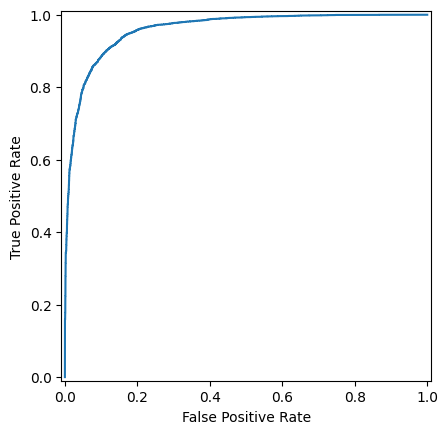

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
print("Acc val:", accuracy_score(y_val, y_val_pred))
print("AUC val:", roc_auc_score(y_val, y_val_proba))
print("LogLoss:", log_loss(y_val, y_val_proba))
print(classification_report(y_val, y_val_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [18]:
import joblib
joblib.dump(pipeline, "../models/baseline.pkl")

['../models/baseline.pkl']